# (11468) Shantanunaidu orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
body_id = '11468'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
body_radius = 0.0

In [4]:
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias = False
debias_lowres = True
deweight = True
eliminate = False
max_obs_per_night = 4
verbose = True
obs_array_optical, observer_codes_optical = fit.get_optical_obs_array(body_id, optical_obs_file, t_min_tdb, t_max_tdb, debias, debias_lowres, deweight, eliminate, max_obs_per_night, verbose)
obs_array_radar, observer_codes_radar = fit.get_radar_obs_array(body_id, t_min_tdb, t_max_tdb, verbose)

Skipped 24 observations 
	 24 of which were non-geocentric occultations or space-based observations, 
	 0 were either roving or radar observations (radar is handled separately), 
	 0 of which were outside the specified time range.
No debiasing needed for 623 observations. Debiased 966 observations. No biasing information for 24 observations.
Applied default weight of 1 arcsec to 102 CCD observations
Deweighted 407 observations as part of deweighting scheme.


In [5]:
n_iter_max = 10
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)
fit_sim = fit.FitSimulation(init_sol, init_cov, obs_array_optical, observer_codes_optical, obs_array_radar, observer_codes_radar, n_iter_max=n_iter_max, de_kernel=de_kernel, de_kernel_path=de_kernel_path, radius=body_radius, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.462			 0.516			 859.200			 0.267
2			 0.462			 0.516			 859.161			 0.267
Converged without rejecting outliers. Starting outlier rejection now.
3			 0.417			 0.483			 750.222			 0.234
4			 0.417			 0.483			 750.186			 0.234
Converged after rejecting outliers.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations at iteration 4 (of 4):
RMS unweighted: 0.4171997162122567
RMS weighted: 0.4832775053125003
chi-squared: 750.1855566171289
reduced chi-squared: 0.23399424722929785
square root of reduced chi-squared: 0.4837295186664732
t: MJD 57508.0 TDB
Fitted Variable		Initial Value			Uncertainty			Fitted Value 			Uncertainty			Change				Change (sigma)
e			1.66697367962e-01		3.14439449407e-08 		1.66697372286e-01		2.98836556854e-08 		+4.32384775206e-09		+0.138
q			2.56503058699e+00		9.88646932361e-08 		2.56503057311e+00		9.41000219303e-08 		-1.38760949397e-08		-0.140
tp			5.75113606064e+04		4.97012942237e-05 		5.75113606030e+04		4.94022103515e-05 		-3.40395490639e-06		-0.068
om			2.06375835706e+02		2.22354436006e-04 		2.06375804825e+02		2.25687036770e-04 		-3.08806890530e-05		-0.139
w			1.54025434236e+02		2.22569713937e-04 		1.54025464572e+02		2.25867341481e-04 		+3.03365949321e-05		+0.136
i			7.88804543607e-01		3.53397440345e-06 		7.88804501957e-01		3.56432188653e

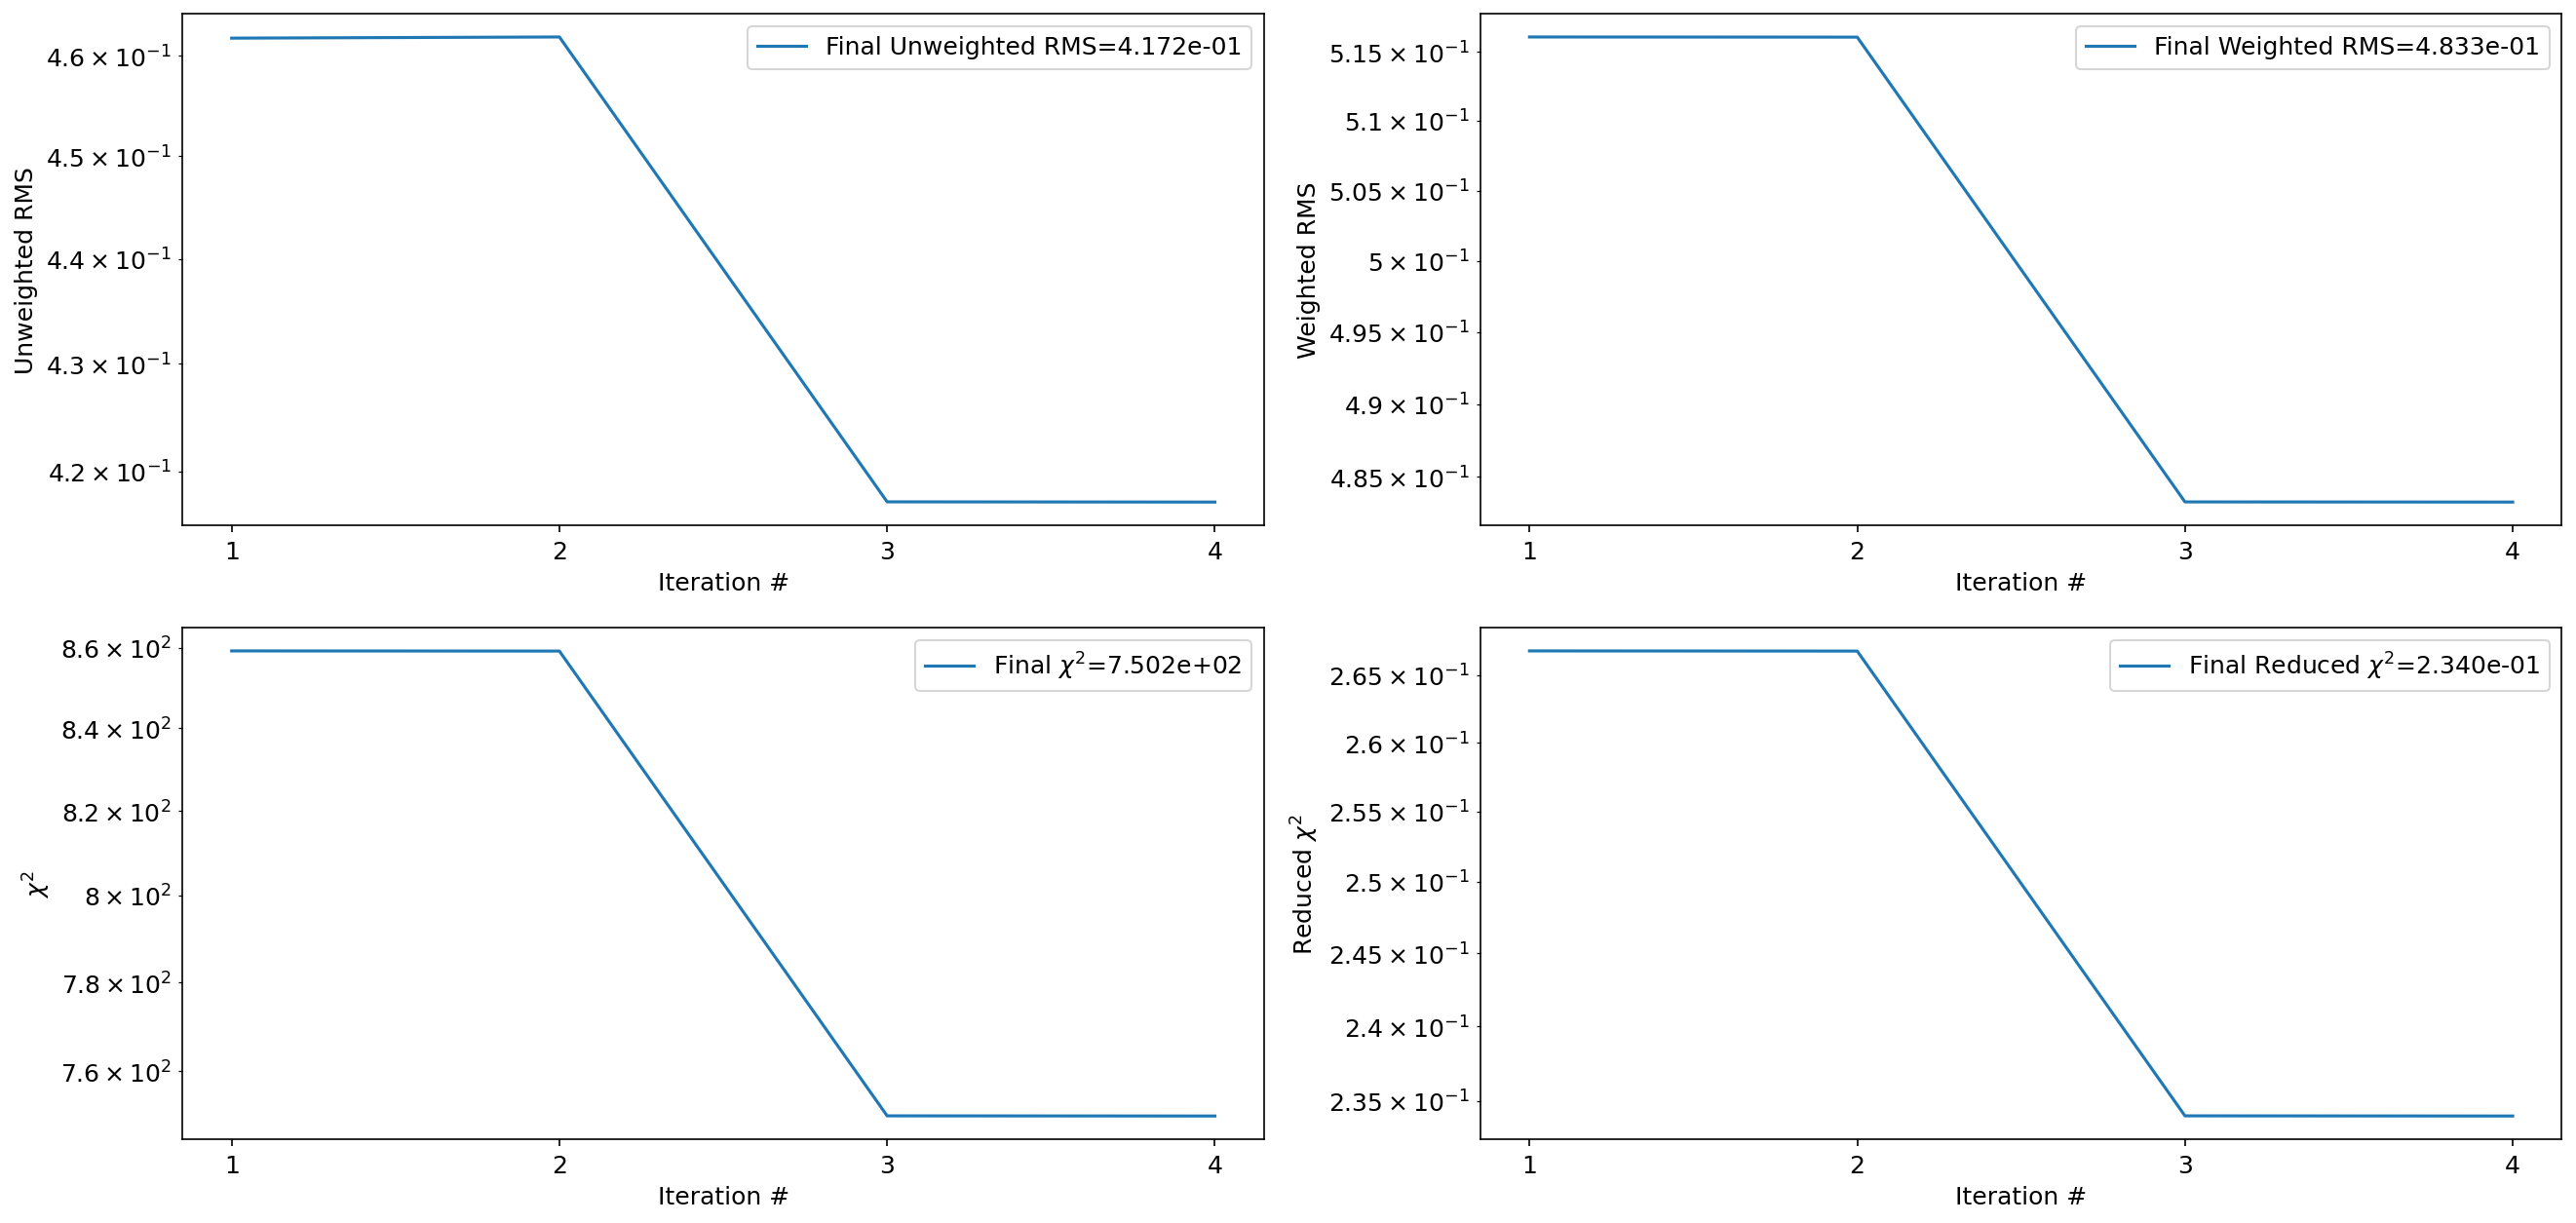

In [8]:
fit_sim.plot_summary(auto_close=True)

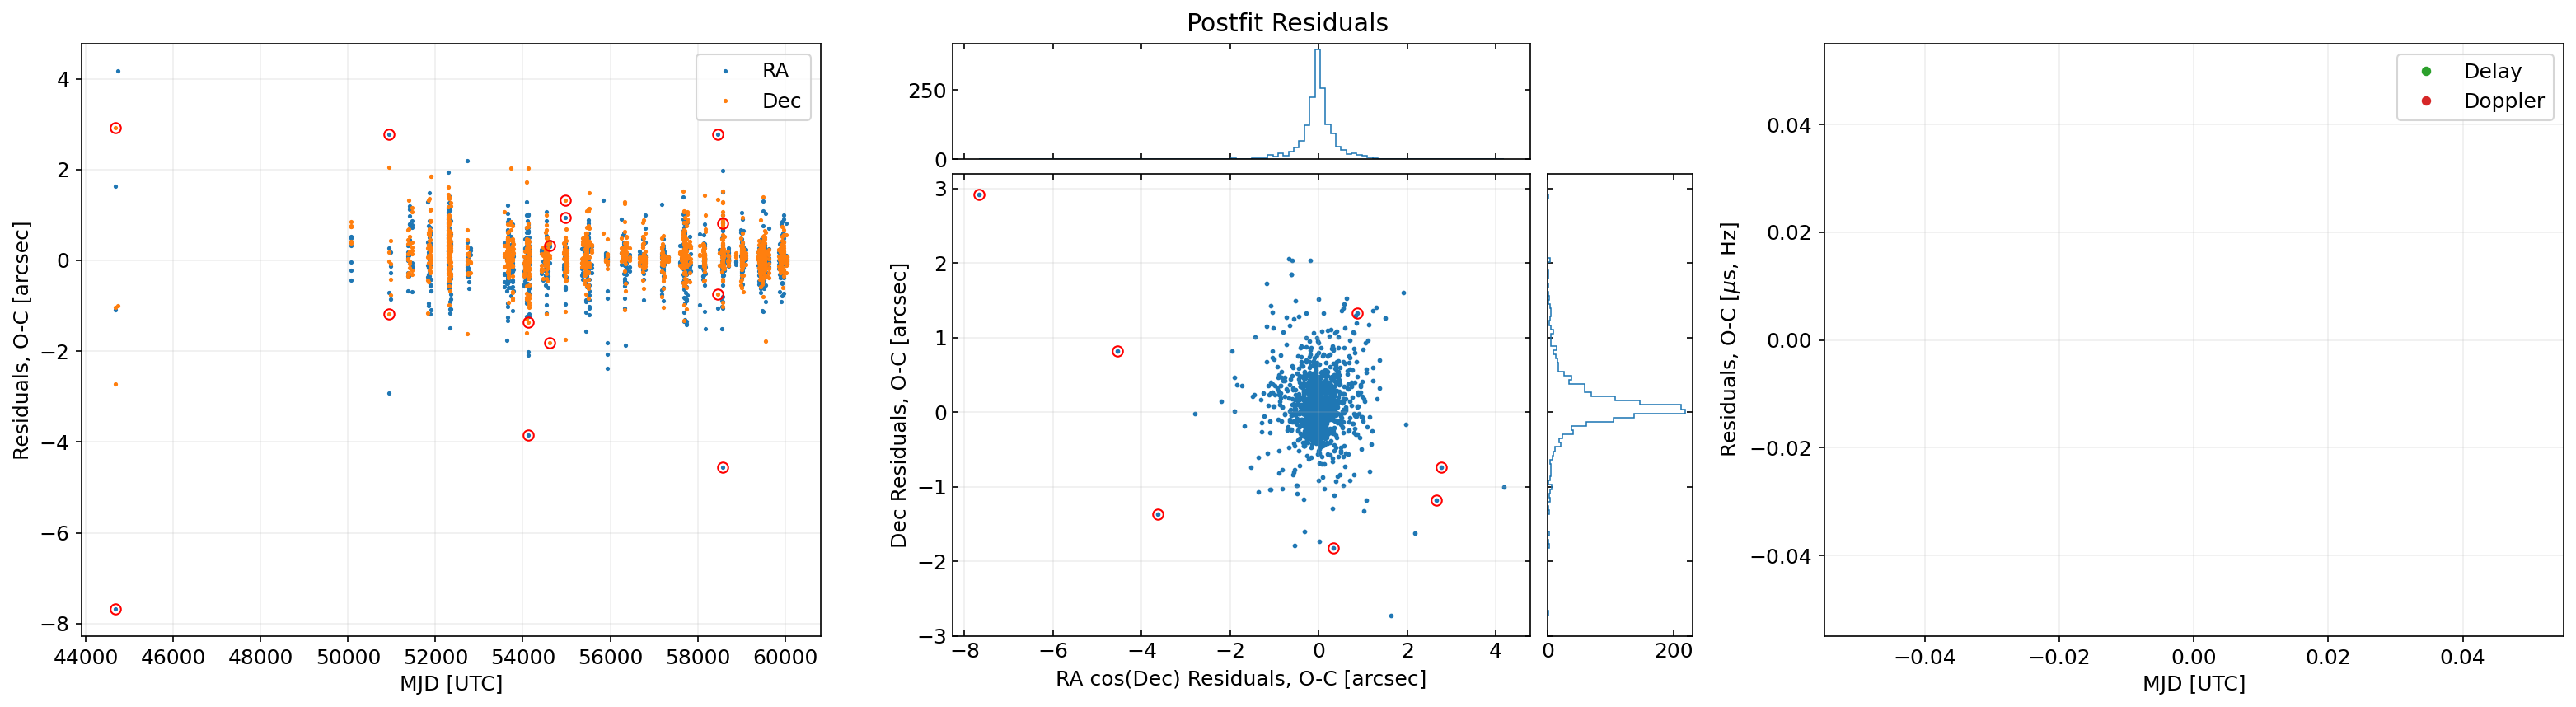

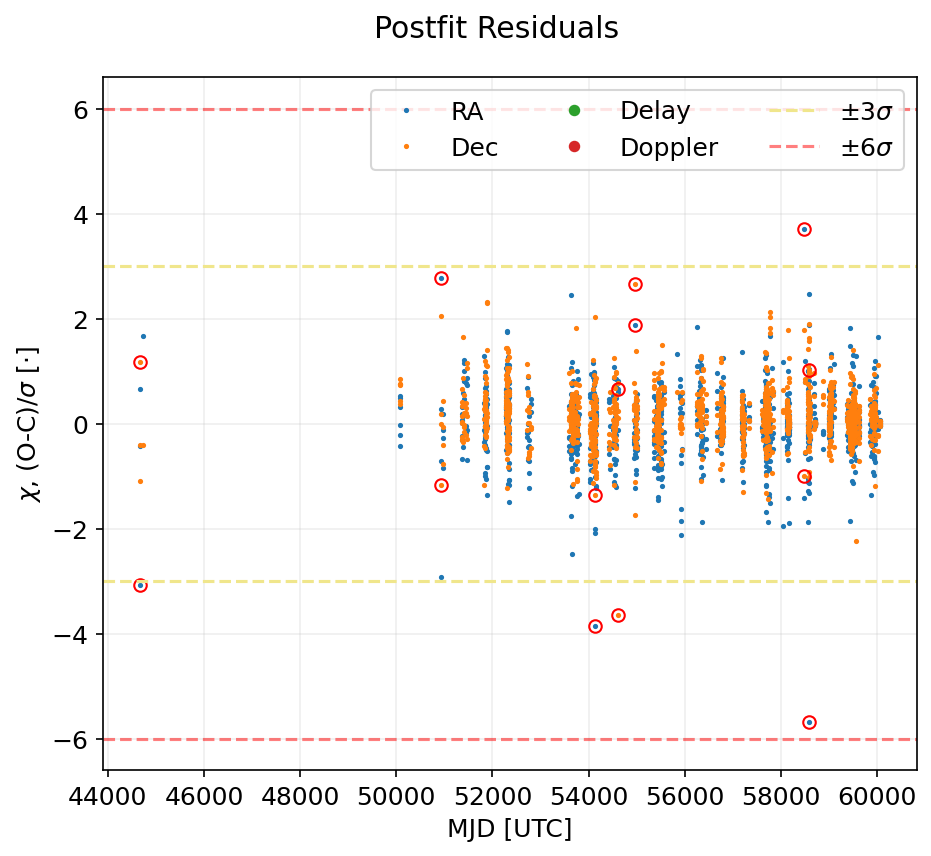

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)

In [10]:
mean_0 = np.array(list(init_sol.values())[1:])
cov_0 = init_cov
mean_f = np.array(list(fit_sim.x_nom.values()))
cov_f = fit_sim.covariance

maha_dist_f, maha_dist_0, bhattacharya, bhatt_coeff = fit.get_similarity_stats(mean_0, cov_0, mean_f, cov_f)
print(f'Mahalonobis distance between JPL and GRSS solution: {maha_dist_f:0.2f}')
print(f'Mahalonobis distance between GRSS and JPL solution: {maha_dist_0:0.2f}')
print(f'Bhattacharya distance between JPL and GRSS solution: {bhattacharya:0.4f}')
print(f'Bhattacharya coefficient between JPL and GRSS solution: {bhatt_coeff:0.4f}')

Mahalonobis distance between JPL and GRSS solution: 0.23
Mahalonobis distance between GRSS and JPL solution: 0.23
Bhattacharya distance between JPL and GRSS solution: 0.0014
Bhattacharya coefficient between JPL and GRSS solution: 0.9986


In [11]:
assert maha_dist_f < 3.0
assert maha_dist_0 < 3.0
assert bhattacharya < 0.10
assert bhatt_coeff > 0.90